
# WQ_ML_GROUP_3 - G

## Submission 3: Modeling and Strategy Development

Group Member:

1. Aliaksandr Panko
2. Oliseamaka Olise
3. Ugochukwu Nnalue
4. Ntui Gideon Ateke

### Tasks:

**Modeling**
 
1. Decide on an algorithm or group of algorithms (for example, ensemble techniques).
2. Fit the model
3. Show that it works out of sample, and use appropriate cross-validation techniques.
4. Provide the following performance metrics:

    (a) ROC curves,

    (b) Confusion Matrix,

    (c) Precision, Recall, F1-Score, Accuracy, and AUC.
   

5. Analysis of metrics and report.


**Fund factsheet**

Create a fund factsheet for your new investment strategy.


______________________________________________________________________________________________________________________________
## Overview

### Stocks & Trading

When a company wants to grow and undertake new projects or expand, it can issue stocks to raise capital. A stock represents a share in the ownership of a company and is issued in return for money. Stocks are bought and sold: buyers and sellers trade existing, previously issued shares. The price at which stocks are sold can move independent of the company’s success: the prices instead reflect supply and demand. This means that, whenever a stock is considered as ‘desirable’, due to a success, popularity, … the stock price will **go up**.

**Note** that stocks are not exactly the same as bonds, which is when companies raise money through borrowing, either as a loan from a bank or by issuing debt.

As you just read, buying and selling or trading is essential when you’re talking about stocks, but certainly not limited to it: trading is the act of buying or selling an asset, which could be financial security, like stock, a bond or a tangible product, such as gold or oil.

Stock trading is then the process of the cash that is paid for the stocks is converted into a share in the ownership of a company, which can be converted back to cash by selling, and this all hopefully with a profit. Now, to achieve a profitable return, you either go long or short in markets: you either by shares thinking that the stock price will go up to sell at a higher price in the future, or you sell your stock, expecting that you can buy it back at a lower price and realize a profit. When you follow a fixed plan to go long or short in markets, you have a **trading strategy**.

Trading strategies are usually verified by backtesting: you reconstruct, with historical data, trades that would have occurred in the past using the rules that are defined with the strategy that you have developed. This way, you can get an idea of the effectiveness of your strategy and you can use it as a starting point to optimize and improve your strategy before applying it to real markets. Of course, this all relies heavily on the underlying theory or belief that any strategy that has worked out well in the past will likely also work out well in the future, and, that any strategy that has performed poorly in the past will likely also do badly in the future.

In this project we will develop a trading strategy by building a machine learning model which will enable us to make a decision in trading a stock **'GOOGLE'** in the market with an initial capital of $1,000 **'Equity'**. Building the model will go through a couple of phase. First, formulate a strategy and specify it in a form that we can test our model. Secondly, test the model’s ability to predict new data **'Cross validation'** and then evaluate the performance and robustness of our model **'Confusion matrix'**. Finally, we will then produce a fund factsheet for our investment strategy. 


### Objective

To implement a trading strategy using machine learning

**Reference** :
>  -Karlijn Willem (June 1st, 2017), [[Python For Finance: Algorithmic Trading]](https://www.datacamp.com/community/tutorials/finance-python-trading)

>  -Anthony Cavallaro (Aug 23, 2018), [[Introduction to "Advances in Financial Machine Learning" by Lopez de Prad]](https://www.quantopian.com/posts/introduction-to-advances-in-financial-machine-learning-by-lopez-de-prado)

>  - [[Github]](https://github.com/BlackArbsCEO/Adv_Fin_ML_Exercises/tree/master/notebooks)

## Modeling and Strategy Development

In this section we need to execute the next steps:
* Import Dataset
* Trading Strategy
* Ensemble techniques
* Analysis of metrics and report
* Fund factsheet

In [1]:
# Import libraries
%load_ext watermark
%watermark

%load_ext autoreload
%autoreload 2

# import standard libs
from IPython.display import display
from IPython.core.debugger import set_trace as bp
from pathlib import PurePath, Path
import sys
import time
from collections import OrderedDict as od
import re
import os

# get project dir
pp = PurePath(Path.cwd()).parts[:-1]
pdir = PurePath(*pp)
data_script_dir = pdir / 'src' / 'data'
bars_script_dir = pdir / 'src' / 'features'
sys.path.append(data_script_dir.as_posix())
sys.path.append(bars_script_dir.as_posix())
viz_dir = pdir / 'reports' / 'figures'
data_dir = pdir / 'data'


# import python scientific stack
import pandas as pd
import pandas_datareader.data as web
pd.set_option('display.max_rows', 100)
from dask import dataframe as dd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm


# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns


# import util libs
from tqdm import tqdm, tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
import missingno as msno

RANDOM_STATE = 777

print()
%watermark -p pandas,pandas_datareader,dask,numpy,sklearn,statsmodels,scipy,ffn,matplotlib,seaborn

2018-11-22T15:45:52+01:00

CPython 3.6.6
IPython 6.5.0

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 76 Stepping 4, GenuineIntel
CPU cores  : 4
interpreter: 64bit

pandas 0.23.4
pandas_datareader 0.7.0
dask 0.19.1
numpy 1.14.2
sklearn 0.19.2
statsmodels 0.9.0
scipy 1.1.0
ffn (0, 3, 4)
matplotlib 2.2.2
seaborn 0.9.0


## (A) Import Dataset

Note this dataset below is from our submission two `feature engineering` which we import to provide useful features for our `model`. 
The essence of these features matrix is to produce an IID (independent and identically distribution) which is required by machine learning.

In [2]:
infp = PurePath(data_dir/'processed'/'clean_Google_features.parq')
df = pd.read_parquet(infp)
print(df.sample(5))

                 price     MACD_12     MACD_26   STOCH-K  SRL_Corr  \
Date                                                                 
2008-07-03  268.768768  274.236137  273.561294  0.809889  0.782988   
2013-01-10  371.111115  357.908889  352.473530  0.693914  0.873908   
2017-04-12  841.460022  847.371848  843.163956  0.631326  0.654742   
2009-01-29  171.831833  158.314615  160.329116  0.649800  0.807841   
2009-04-20  189.839844  180.680000  174.526938  0.231030  0.715803   

                  EMA9      Mom_9       Nasdaq  
Date                                            
2008-07-03  268.846428  -4.719727  2245.379883  
2013-01-10  365.216384  17.612610  3121.760010  
2017-04-12  844.414021  -8.019958  5836.160156  
2009-01-29  163.264746  22.187195  1507.839966  
2009-04-20  188.564662   5.535538  1608.209961  


## (B) Trading Strategy

In [3]:
# Initialize the slow and fast windows
slow_window = 12
fast_window = 26

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame()
signals['bin'] = 0.0

# Create short simple moving average over the short window
signals['slow_mavg'] = df.price.ewm(slow_window).mean()

# Create long simple moving average over the long window
signals['fast_mavg'] = df.price.ewm(fast_window).mean()

# Create signals
signals['bin'][slow_window:] = np.where(signals['slow_mavg'][slow_window:] 
                                            > signals['fast_mavg'][slow_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['bin'].diff()

# Print `signals`
print(signals.sample(5))

            bin    slow_mavg    fast_mavg  positions
Date                                                
2018-06-19  1.0  1126.548564  1103.143744        0.0
2011-01-26  1.0   306.471848   300.438720        0.0
2009-11-11  1.0   270.583469   258.613834        0.0
2016-12-07  0.0   784.527888   789.686332        0.0
2008-10-16  0.0   194.589510   212.821042        0.0


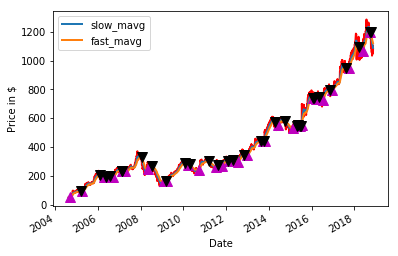

In [4]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
df.price.plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['slow_mavg', 'fast_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.slow_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.slow_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

Add the trading signals to the dataframe

In [5]:
# df['bin'] = signals['signal']
# df.sample(5)
Xy = (pd.merge_asof(df, signals[['bin']], 
                    left_index=True, right_index=True, 
                    direction='forward').dropna())
data = Xy
print(data.sample(5))

                  price      MACD_12      MACD_26   STOCH-K  SRL_Corr  \
Date                                                                    
2010-02-22   271.671661   274.400128   279.145711  0.276918  0.318503   
2016-06-03   735.859985   735.437628   737.787668  0.257257  0.840988   
2008-08-15   255.330338   249.901175   256.573749  0.901165  0.843765   
2005-04-11    96.711708    92.838914    92.865486  0.366933  0.920373   
2018-08-06  1237.670044  1212.301630  1176.371632  0.598496  0.715165   

                   EMA9      Mom_9       Nasdaq  bin  
Date                                                  
2010-02-22   270.110612   4.669647  2242.030029  0.0  
2016-06-03   738.822450  14.149963  4942.520020  0.0  
2008-08-15   249.081666  23.598602  2452.520020  0.0  
2005-04-11    94.269483   6.836830  1992.119995  0.0  
2018-08-06  1236.577442 -20.479980  7859.680176  1.0  


#### Pairplots
let us generate some pairplots to observe the distribution of data from one feature to the other. we will
use Seaborn to help us

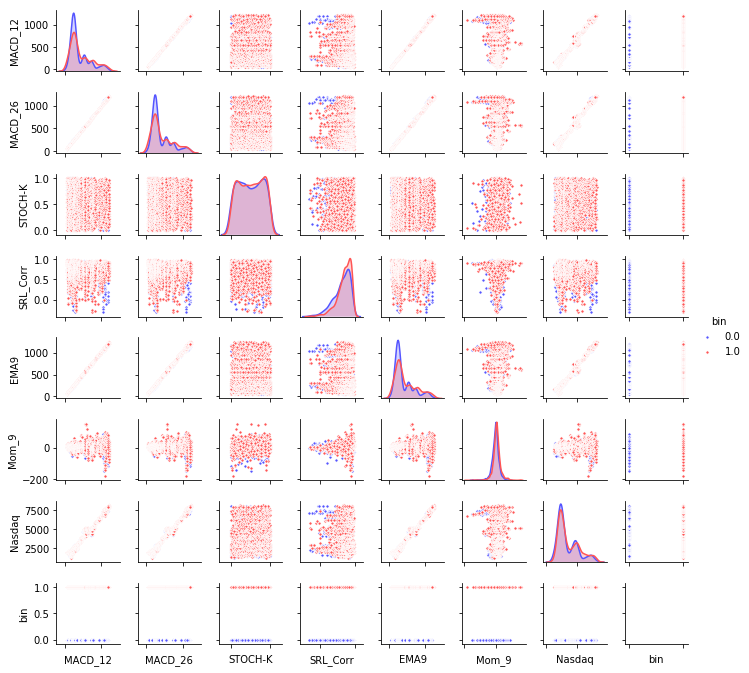

In [6]:
## Pairplots
g = sns.pairplot(data[[u'MACD_12', u'MACD_26', u'STOCH-K', u'SRL_Corr', u'EMA9', u'Mom_9', u'Nasdaq', u'bin']], hue='bin', palette = 'seismic', size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [7]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report

### Cross Validation Techniques

Cross Validation is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it.

Here are the steps involved in cross validation:

   1. You reserve a sample data set
   2. Train the model using the remaining part of the dataset
   3. Use the reserve sample of the test (validation) set. This will help you in gauging the effectiveness of your model’s performance. If your model delivers a positive result on validation data, go ahead with the current model. It rocks!



#### Creating NumPy arrays out of our data sets

We will generate NumPy arrays out of their original dataframes(data) by splitting the dataframe into training, cross validation and test set as follows:

In [8]:
data.shape

(3576, 9)

In [9]:
# train, validation = train_test_split(data, test_size=0.50, random_state = 5)

train = data[:2500]
validation = data[2500:3576]

# cross validation set
cv_train = validation.drop('bin',axis=1).values 
cv_test = validation['bin'].values

# training set
X = train.drop('bin',axis=1).values
y = train['bin'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)
print("%r, %r, %r" % (X.shape, X_train.shape, X_test.shape))

(2500, 8), (1250, 8), (1250, 8)


## (C) Ensemble techniques

### XGBoost

XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as **‘regularized boosting‘** technique.
[[comprehensive guide for ensemble]](https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/)

Let us see how XGBoost is comparatively better than other techniques:

1. **Regularization:**
   - Standard GBM implementation has no regularisation like XGBoost.
   - Thus XGBoost also helps to reduce overfitting.


2. **Parallel Processing:**
   - XGBoost implements parallel processing and is faster than GBM .
   - XGBoost also supports implementation on Hadoop.


3. **High Flexibility:**
   - XGBoost allows users to define custom optimization objectives and evaluation criteria adding a whole new dimension to the model.


3. **Handling Missing Values:**
   - XGBoost has an in-built routine to handle missing values.


4. **Tree Pruning:**
    - XGBoost makes splits up to the max_depth specified and then starts pruning the tree backwards and removes splits beyond which there is no positive gain.


5. **Built-in Cross-Validation:**
   - XGBoost allows a user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
   
   

**parameters** :

**max_depth** : How deep you want to grow your tree. Beware if set to too high a number might run the risk of overfitting.

**gamma** : minimum loss reduction required to make a further partition on a leaf node of the tree. The larger, the more conservative the algorithm will be.

**eta** : step size shrinkage used in each boosting step to prevent overfitting

In [10]:
import xgboost as xgb
import seaborn as sns

gbm = xgb.XGBClassifier(
#     learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_train, y_train)


print('Training is complete')

# Backtesting
print('Model validation accuracy on New Data: ', gbm.score(cv_train, cv_test).round(2)) 
print('Model test accuracy on New Data: ', gbm.score(X_test, y_test).round(3))

Training is complete


C:\Users\chidindu\Anaconda2\envs\wqu_ml_fin\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Model validation accuracy on New Data:  0.69


C:\Users\chidindu\Anaconda2\envs\wqu_ml_fin\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Model test accuracy on New Data:  0.704


**NOTE**:
The goal of cross-validation is to test the model’s ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

C:\Users\chidindu\Anaconda2\envs\wqu_ml_fin\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

   no_trade       0.00      0.00      0.00       329
      trade       0.69      1.00      0.82       747

avg / total       0.48      0.69      0.57      1076



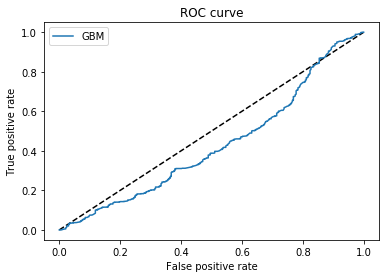

In [11]:
# model performance on unknown dataset set

y_valid_pred_gbm = gbm.predict_proba(cv_train)[:, 1]
y_valid_pred = gbm.predict(cv_train)
fpr, tpr, _ = roc_curve(cv_test, y_valid_pred_gbm)
print(classification_report(cv_test, y_valid_pred, target_names=['no_trade','trade']))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='GBM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

_______________________________________________________________________________________________________________
## (D) Analysis of metrics and report

            bin    slow_mavg    fast_mavg  positions
Date                                                
2017-12-18  1.0  1046.018315  1027.666927        0.0
2008-08-08  0.0   248.700727   257.472471        0.0
2008-03-11  0.0   242.497936   267.113782        0.0
2016-06-01  0.0   734.663466   737.615340        0.0
2013-09-27  1.0   442.020860   441.155298        0.0
2013-01-07  1.0   354.818638   350.463900        0.0
2017-07-12  1.0   955.160020   945.790035        0.0
2013-08-22  1.0   441.542951   441.265780        0.0
2006-01-19  1.0   220.779806   208.576013        0.0
2016-03-30  1.0   747.127091   741.293528        0.0
                 price     MACD_12     MACD_26   STOCH-K  SRL_Corr  \
Date                                                                 
2017-04-28  924.520020  865.357712  854.027093  0.102527  0.913609   
2010-10-22  306.571564  277.382836  263.420008  0.519916  0.882646   
2008-06-04  286.396393  281.717787  272.845798  0.570261  0.628883   
2012-06-20  28

C:\Users\chidindu\Anaconda2\envs\wqu_ml_fin\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Model validation accuracy on New Data:  0.69


C:\Users\chidindu\Anaconda2\envs\wqu_ml_fin\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Model test accuracy on New Data:  0.704


C:\Users\chidindu\Anaconda2\envs\wqu_ml_fin\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

   no_trade       0.00      0.00      0.00       329
      trade       0.69      1.00      0.82       747

avg / total       0.48      0.69      0.57      1076



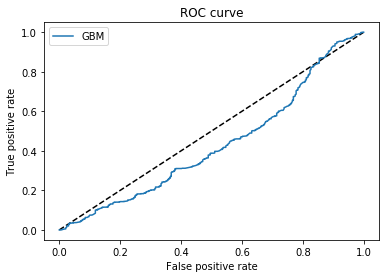

In [12]:
## Analysis of metrics and report

# Print `signals`
print(signals.sample(10))

# Dataframe Features
print(data.sample(5))


### run model ###
gbm = xgb.XGBClassifier(
#     learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_train, y_train)


print("Training is complete")

# Backtesting
print('Model validation accuracy on New Data: ', gbm.score(cv_train, cv_test).round(2)) 
print('Model test accuracy on New Data: ', gbm.score(X_test, y_test).round(3))

# model performance on unknown dataset set
y_valid_pred_gbm = gbm.predict_proba(cv_train)[:, 1]
y_valid_pred = gbm.predict(cv_train)
fpr_gbm, tpr_gbm, _ = roc_curve(cv_test, y_valid_pred_gbm)
print(classification_report(cv_test, y_valid_pred, target_names=['no_trade','trade']))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gbm, tpr_gbm, label='GBM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### Confusion matrix terminology

A confusion matrix is a table that is often used to **describe the performance of a classification model** (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing. Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.

This means, precision is the fraction of cases where the algorithm correctly predicted class i out of all instances where the algorithm predicted i (correctly and incorrectly). recall on the other hand is the fraction of cases where the algorithm correctly predicted i out of all of the cases which are labelled as i.

Let's now define the most basic terms:

   - **true positives (TP)** : These are cases in which we predicted trade, and we have to trade.
   - **true negatives (TN)** : We predicted no trade, and we are supposed to trade.
   - **false positives (FP)** : We predicted trade, but we are not to trade. (Also known as a "Type I error.")
   - **false negatives (FN)** : We predicted no trade, but we actually to trade. (Also known as a "Type II error.")
   

   - **F Score** : This is a weighted average of the true positive rate (recall) and precision.[[More details about the F Score]](http://en.wikipedia.org/wiki/F1_score)
   - **ROC Curve** : This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class.[[More details about ROC Curves]](http://www.dataschool.io/roc-curves-and-auc-explained/)
   
[[Simple guide to confusion matrix terminology]](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

#### What can we learn from this matrix?

- There are two possible predicted classes: "trade" and "no trade". If we were predicting the position of the stock in the market, for example, "trade" would mean that we have to trade, and "no trade" would mean we don't have to trade.
- The classifier made an average precision of 48% prediction and average recall of 69% prediction.
- Out of the total volting of 1076, 747 support us to trade while 329 support us not to trade.

Therefore, from our confusion matrix we are expected to trade google stock in the market.


____________________________________________________________________________________________________________
### Stock returns

In [13]:
# Stock returns
stock_returns = np.log(df['price']).diff().dropna()
stock_returns.sample(5)

Date
2014-01-27   -0.020315
2011-11-16   -0.008290
2016-06-13   -0.001788
2017-06-22   -0.002015
2008-03-07    0.001501
Name: price, dtype: float64

## (E) Fund factsheet

Annualized sharpe ratio: 0.72


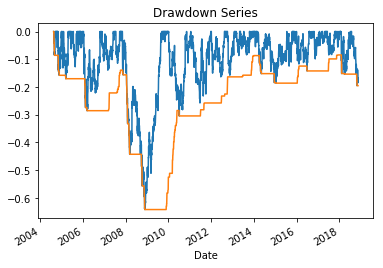

In [14]:
## Evaluating trading Strategy

# Isolate the returns of your strategy
returns = stock_returns

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print('Annualized sharpe ratio:', sharpe_ratio.round(2))

## Maximum Drawdown
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = df.price.rolling(window, min_periods=1).max()
daily_drawdown = df.price/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.title('Drawdown Series')
plt.show()

### Compound Annual Growth Rate

In [15]:
##  Compound Annual Growth Rate (CAGR)
# Get the number of days in `aapl`
days = (df.index[-1] - df.index[0]).days

# Calculate the CAGR 
cagr = ((((df.price[-1]) / df.price[1])) ** (365.0/days)) - 1

# Print the CAGR
print('CAGR: ', cagr.round(2))

CAGR:  0.23


## pyfolio

**Fact Sheet**

Using our returns DataFrame `stock_returns` to Create a fact sheet for the stock

In [16]:
import pyfolio as pf

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Start date,2004-08-20
End date,2018-11-15
Total months,170
,Backtest
Annual return,18.5%
Cumulative returns,1024.8%
Annual volatility,30.1%
Sharpe ratio,0.72
Calmar ratio,0.27
Stability,0.78
Max drawdown,-69.9%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,69.85,2007-11-06,2008-11-24,2013-10-29,1561
1,30.21,2006-01-11,2006-03-13,2006-11-17,223
2,20.25,2018-07-26,2018-10-29,NaT,NaN
3,20.15,2014-02-26,2015-01-12,2015-07-17,363
4,17.43,2005-02-03,2005-03-14,2005-04-22,57


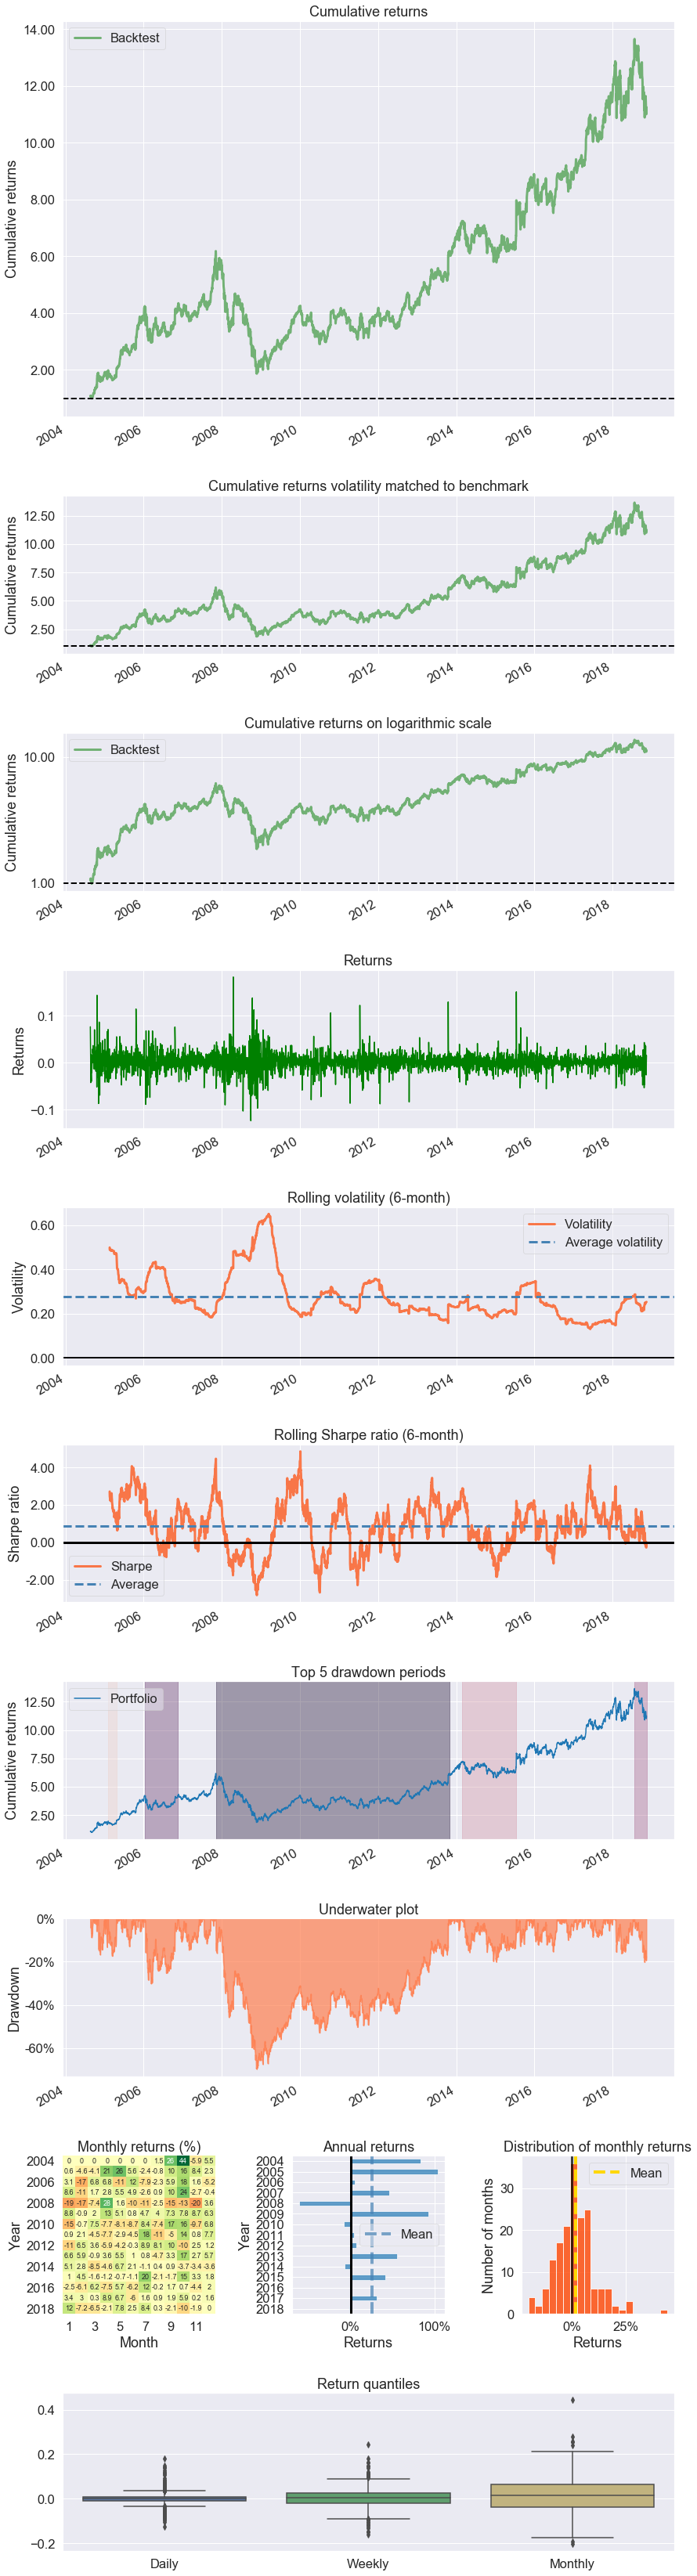

In [17]:
# Fact sheet
pf.create_returns_tear_sheet(stock_returns) 

### Trading Strategy Analysis

We are going to introduce a brilliant python module, `ffn`. The module helps quickly carry out analysis of trading strategies and financial asset price series/history. It can deal with single series using the “PerformanceStats” class, or multiple combined assets simultaneously using the “GroupStats” class.

ffn is a library that contains many useful functions for those who work in **quantitative finance**. It stands on the shoulders of giants (Pandas, Numpy, Scipy, etc.) and provides a vast array of utilities, from performance measurement and evaluation to graphing and common data transformations.

> -Philippe Morissette, [["ffn - Financial Functions for Python"]](http://pmorissette.github.io/ffn/index.html) 

> -[[python for finance]](http://www.pythonforfinance.net/2018/02/27/trading-strategy-analysis-using-python-and-the-ffn-package-part-1/)

In [18]:
import ffn
#%pylab inline

In [19]:
#prices = ffn.get('GOOG', start='2010-01-01')
prices = df['price']

Let's get the the performance of the stock. we will rebase here to get a common starting point of the securities

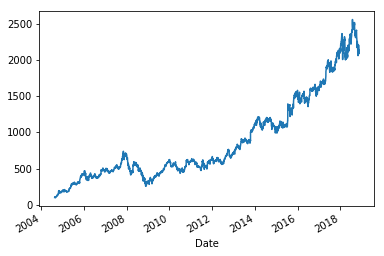

In [20]:
# stock performance 
ax = prices.rebase().plot()

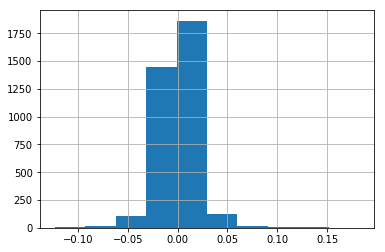

In [21]:
# return distributions
# data = prices.to_returns().dropna()
ax = stock_returns.hist()

Now lets created a Pandas DataFrame `'df_ret'` Returns and added a column of the cumulative sum of those returns, adding $1,000 to represent starting capital, these represent the strategy `equity` or the amount of cash we have in our trading account.

In [22]:
# Create a DataFrame
df_ret = pd.DataFrame()
df_ret['Returns'] = stock_returns
df_ret['Equity'] = stock_returns.cumsum() + 1000.0

print(df_ret.sample(5))

             Returns       Equity
Date                             
2016-12-15 -0.002742  1002.787568
2010-03-24  0.015059  1001.714593
2016-12-29 -0.002103  1002.771788
2009-01-20 -0.058119  1001.035999
2017-06-26 -0.014299  1002.963031


### Now what do the return distributions of the Equity look like?

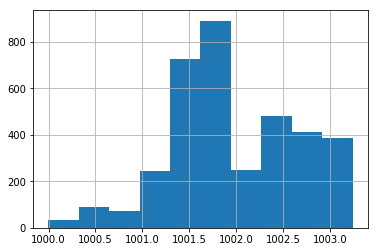

In [23]:
# return distributions
ax = df_ret.Equity.hist()

In [24]:
# ok now what about some performance metrics?
perf = df_ret.Equity.calc_stats()

If we look at what `perf` actually is by looking at its `type`, we can see it is a ffn.core.PerformanceStats object. This means we can use any of the PerformanceStats object methods on it.

In [25]:
type(perf)

ffn.core.PerformanceStats

Let’s start by plotting the equity curve. This is very similar to just calling the usual `plot()` syntax from Pandas.

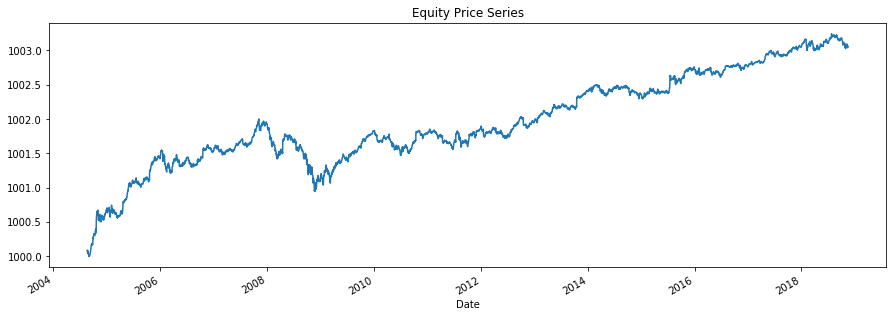

In [26]:
# Equity curve
perf.plot()

Great stuff, so we now have a visual representation of our equity curve. Let’s move on to some statistics; we can very easily do this using ffn by calling the `display()` method. This will print out the following set of comprehensive statistics.

In [27]:
perf.display()

Stats for Equity from 2004-08-20 00:00:00 - 2018-11-15 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
0.30%                0.7  0.02%   -0.11%

Annualized Returns:
mtd     3m      6m      ytd    1y     3y     5y     10y    incep.
------  ------  ------  -----  -----  -----  -----  -----  --------
-0.00%  -0.01%  -0.00%  0.00%  0.00%  0.01%  0.01%  0.02%  0.02%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.70     0.70       0.44
mean    0.02%    0.02%      0.02%
vol     0.03%    0.03%      0.04%
skew    0.57     0.52       -0.88
kurt    9.87     1.87       2.37
best    0.02%    0.04%      0.08%
worst   -0.01%   -0.02%     -0.08%

Drawdowns:
max     avg       # days
------  ------  --------
-0.11%  -0.01%     43.09

Misc:
---------------  ------
avg. up month    0.01%
avg. down month  -0.01%
up year %        78.57%
12m up %         83.2

That is a pretty comprehensive set of statistics – the **Sharpe Ratio**, **Calmar Ratio**, **Total Returns**, **CAGR**, **Max Drawdown**, **Periodic Returns** plus more…that’s not a bad time saver – if we were to have to calculate these all ourselves it could take quite some time.

The next ffn method we might be interested in is that to represent a table of monthly returns. Again, it’s as easy as this:

In [28]:
# monthly returns
perf.display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2004   0      0      0      0      0      0      0     -0.01   0.02   0.04  -0      0.01   0.06
  2005   0     -0     -0      0.02   0.02   0.01  -0     -0      0.01   0.02   0.01   0      0.08
  2006   0     -0.02   0.01   0.01  -0.01   0.01  -0.01  -0      0.01   0.02   0     -0.01   0.01
  2007   0.01  -0.01   0      0      0.01   0     -0      0      0.01   0.02  -0     -0      0.04
  2008  -0.02  -0.02  -0.01   0.03   0     -0.01  -0.01  -0     -0.01  -0.01  -0.02   0     -0.08
  2009   0.01  -0      0      0.01   0.01   0      0      0      0.01   0.01   0.01   0.01   0.07
  2010  -0.02  -0      0.01  -0.01  -0.01  -0.01   0.01  -0.01   0.02   0.02  -0.01   0.01  -0
  2011   0      0     -0     -0.01  -0     -0      0.02  -0.01  -0      0.01   0      0.01   0.01
  2012  -0.01   0.01   

### Plotting a visual representation of our strategy drawdown series

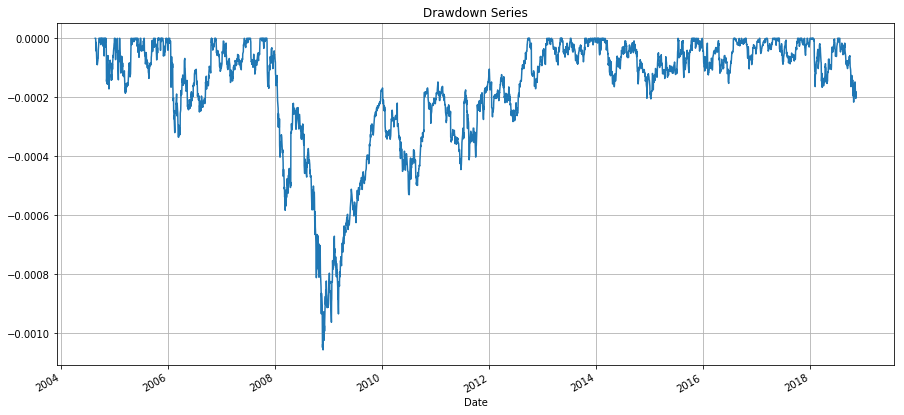

In [29]:
plt.title('Drawdown Series')
ffn.to_drawdown_series(df_ret.Equity).plot(figsize=(15,7),grid=True)

### Backtesting The Trading Strategy

                     GOOG       holdings          cash         total   returns
Date                                                                          
2014-02-07   58930.932617   58930.932617 -24593.088913  34337.843704  0.026145
2015-10-06   67164.001465   67164.001465 -33005.088425  34158.913040 -0.000117
2018-04-13       0.000000       0.000000  46351.912308  46351.912308  0.000000
2016-07-27   76196.997070   76196.997070 -46814.085007  29382.912064  0.014922
2006-02-23       0.000000       0.000000  12619.118118  12619.118118  0.000000
2011-04-28       0.000000       0.000000  23489.990616  23489.990616  0.000000
2018-09-12  117159.997559  117159.997559 -62049.088669  55110.908890 -0.032292
2017-07-24   99830.999756   99830.999756 -50863.090134  48967.909622  0.009212
2015-08-18   68872.998047   68872.998047 -33005.088425  35867.909622 -0.014778
2011-02-18   31535.534668   31535.534668  -5374.374008  26161.160660  0.009307


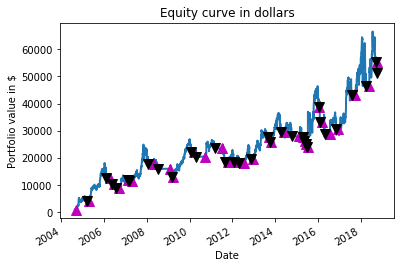

In [30]:
## Backtesting The Trading Strategy
# Set the initial capital
initial_capital= float(1000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['GOOG'] = 100*signals['bin']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(df.price, axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(df.price, axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(df.price, axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.sample(10))


# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.title('Equity curve in dollars')
plt.show()